In [28]:
source('./data_processing.R')

In [29]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# Jurkat TCR stimulated

In [30]:
input_dir = './GiRAFR_outputs/Datlinger_NatureMethods/sample1/'
output_dir = './figures_results/Datlinger_NatureMethods/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 678"
[1] "Wildtype UMI: 755"
[1] "Mutant UMI: 114"


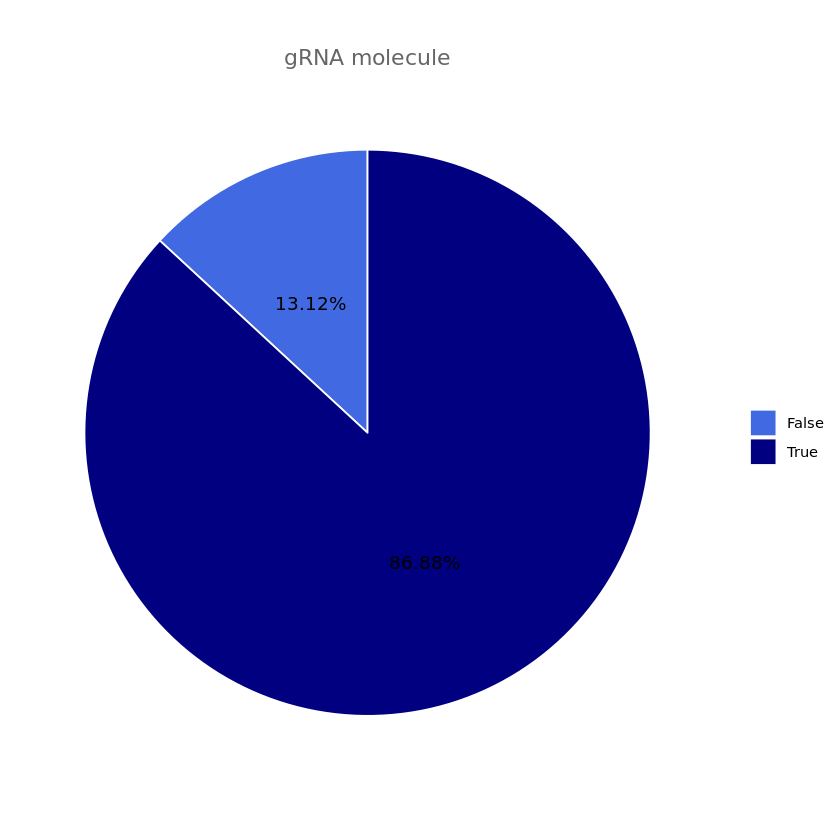

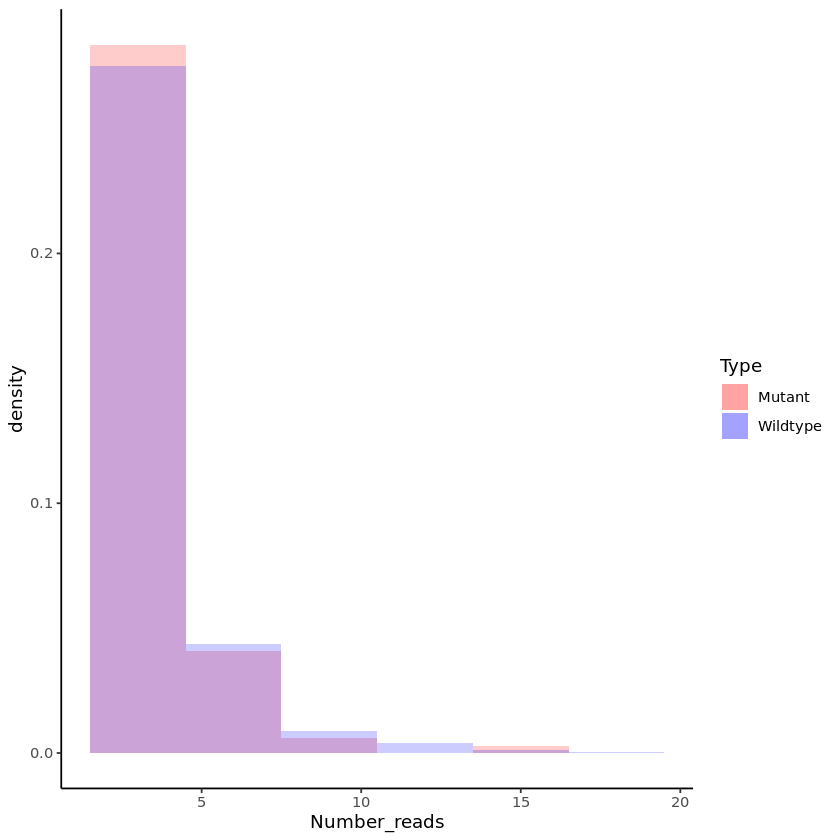

In [4]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [5]:
#consensus.count.matrix <- source_mutation(input_dir)

### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(6)    G I(1)    T 
  15    1   18    2    1    1    6   21   13 
[1] "MT mutation type"

 D  I  S 
22 21 35 
[1] "MT mutation structure"

gRNA Rest   U6 
  48   15   15 


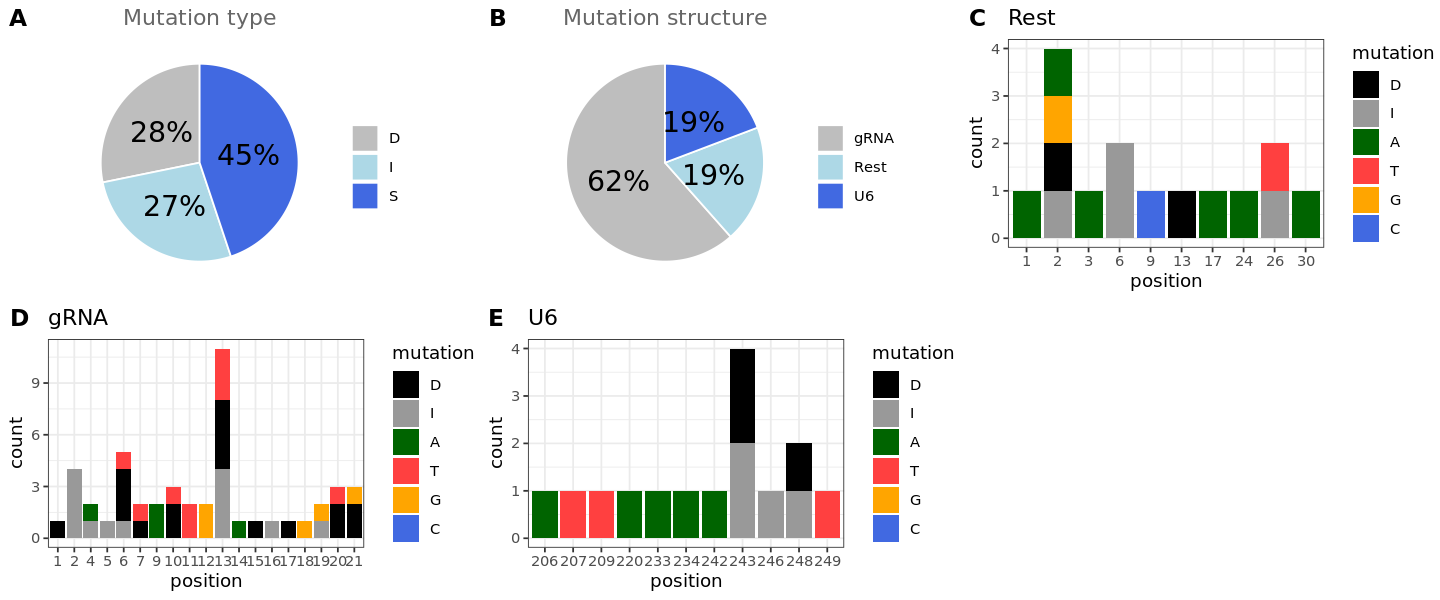

In [31]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [32]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.182   1.000   3.000 

In [33]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT

MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 4 rows containing non-finite values (stat_count).”


png 
  2

# Jurkat TCR unstimulated

In [34]:
input_dir = './GiRAFR_outputs/Datlinger_NatureMethods/sample2/'
output_dir = './figures_results/Datlinger_NatureMethods/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 707"
[1] "Wildtype UMI: 802"
[1] "Mutant UMI: 100"


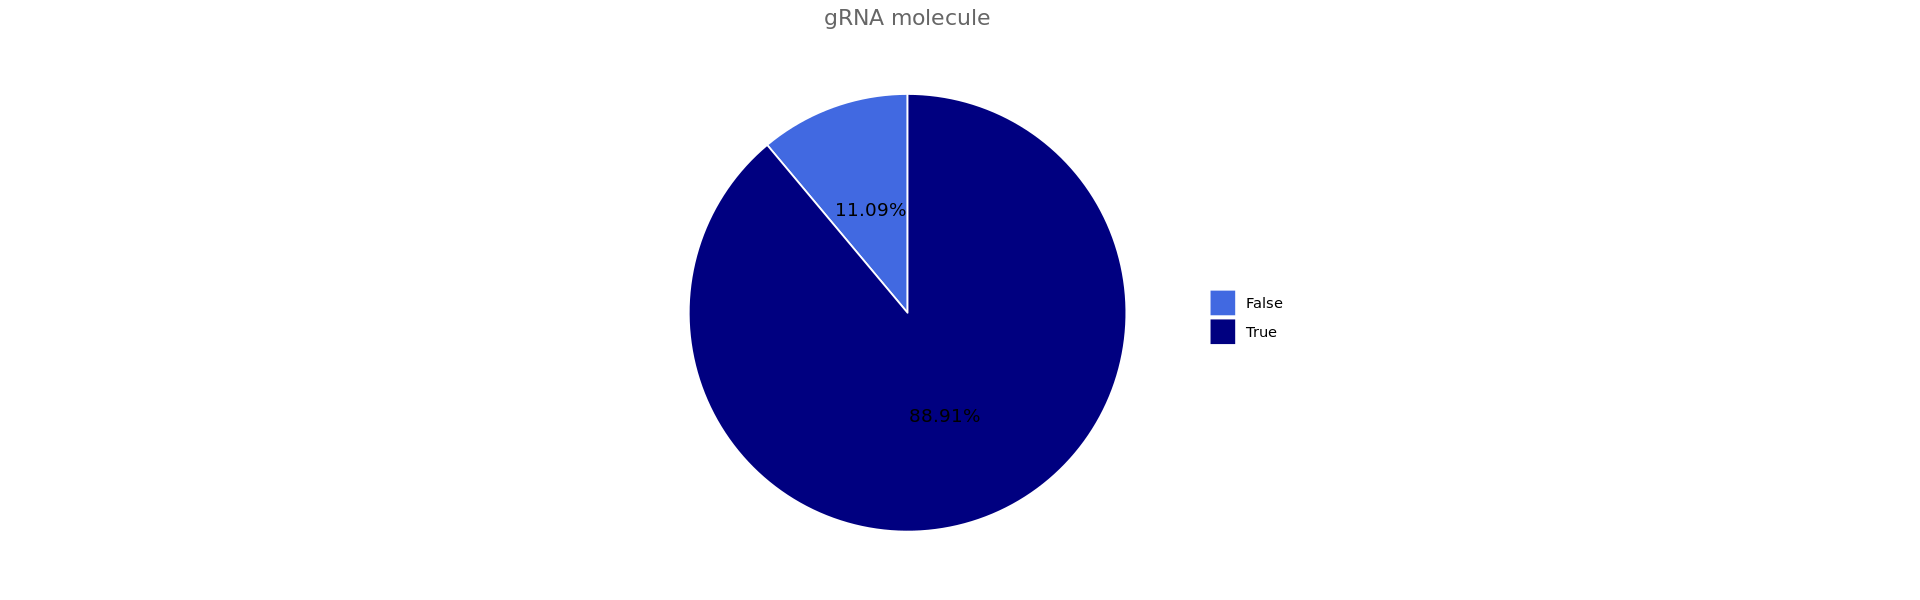

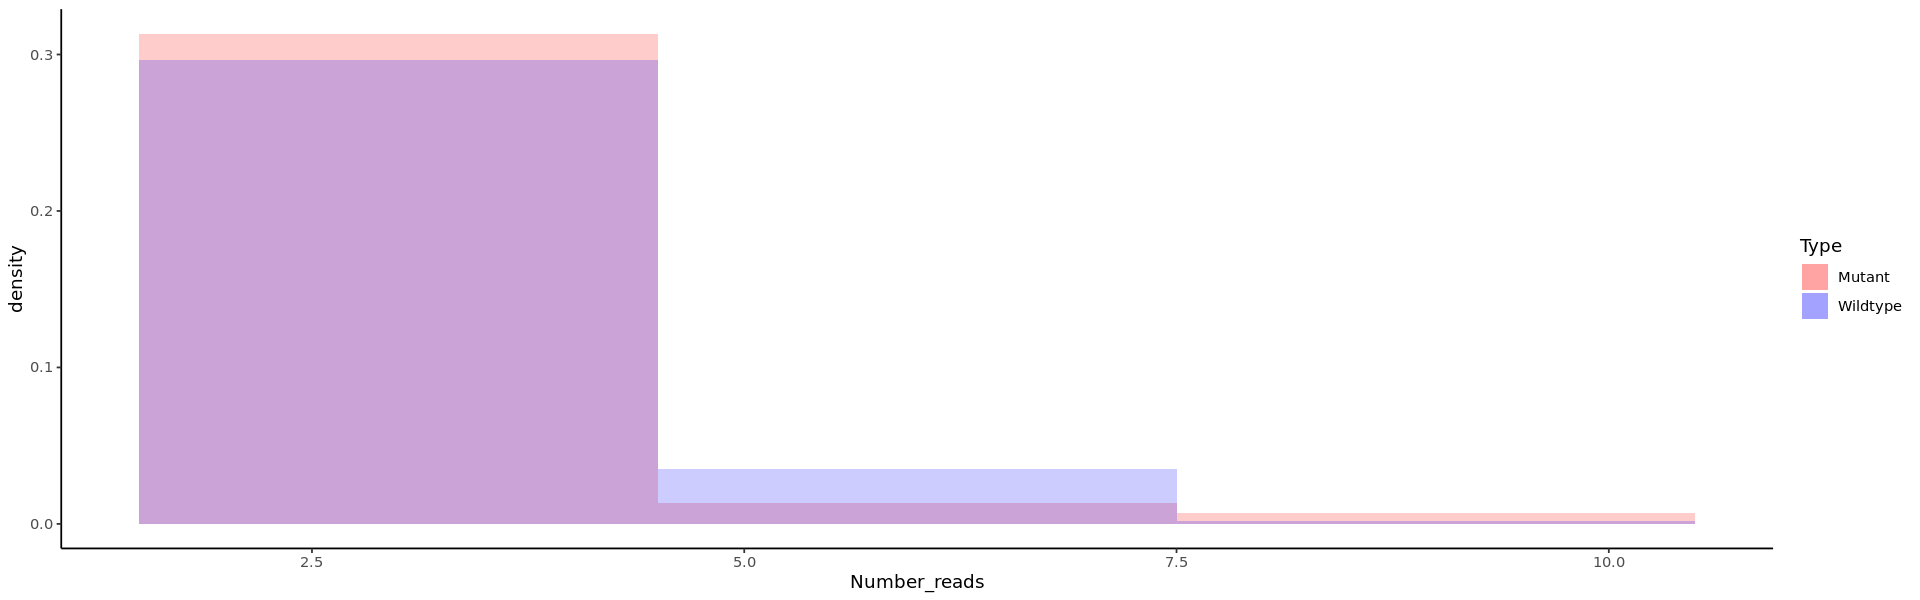

In [11]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [46]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 13"
[1] "MT_virus: 85"


### MT.txt

[1] "MT mutation table"

   A    C D(1)    G I(1)    T 
   6    5   17    1   14   10 
[1] "MT mutation type"

 D  I  S 
17 14 22 
[1] "MT mutation structure"

gRNA Rest   U6 
  34   12    7 


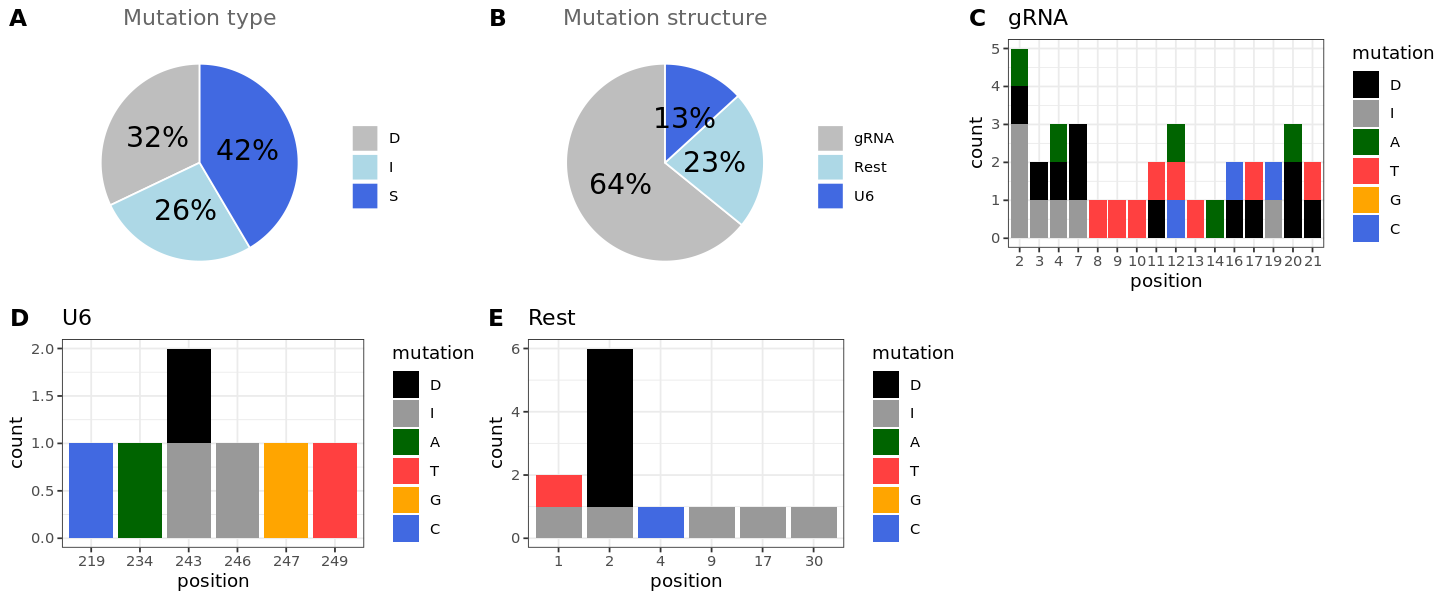

In [35]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [36]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.082   1.000   2.000 

In [37]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT

MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


png 
  2

# combine samples MT position

In [38]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Datlinger_NatureMethods/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Datlinger_NatureMethods/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Datlinger_NatureMethods/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)

options(repr.plot.width = 16, repr.plot.height = 5)
MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,6))
dev.off()

Warning message:
“Removed 5 rows containing non-finite values (stat_count).”
Warning message:
“Removed 5 rows containing non-finite values (stat_count).”


png 
  2

# cell number comparsion

In [52]:
Jurkat_TCR.digital_expression <- read.csv('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Datlinger/GSE92872_CROP-seq_Jurkat_TCR.digital_expression.csv', header = FALSE)

In [53]:
dim(Jurkat_TCR.digital_expression)


[1] 36728  5906

In [54]:
Jurkat_TCR <- as.data.frame(t(head(Jurkat_TCR.digital_expression,4)))
colnames(Jurkat_TCR) <- Jurkat_TCR[1,]
Jurkat_TCR <- Jurkat_TCR[-1,]


In [55]:
Jurkat_TCR.stimulated <- Jurkat_TCR[which(Jurkat_TCR$condition == 'stimulated'),]
Jurkat_TCR.unstimulated <- Jurkat_TCR[which(Jurkat_TCR$condition == 'unstimulated'),]


In [56]:

nrow(Jurkat_TCR.stimulated)
nrow(Jurkat_TCR.unstimulated)


[1] 3259

[1] 2646

In [57]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Datlinger/Jurkat/mapping_to_custom_ref/cell_umi_barcodes.500.cell_barcode.txt', header = FALSE)
nrow(filtered_barcodes)
sum(Jurkat_TCR.stimulated$cell %in% filtered_barcodes$V1)


[1] 8637

[1] 1960

Why? Not many cell barcodes are the same

In [58]:
head(Jurkat_TCR.stimulated$cell[!Jurkat_TCR.stimulated$cell %in% filtered_barcodes$V1])
length(Jurkat_TCR.stimulated$cell[!Jurkat_TCR.stimulated$cell %in% filtered_barcodes$V1])
length(filtered_barcodes$V1[!filtered_barcodes$V1 %in% Jurkat_TCR.stimulated$cell])


[1] "ATCTAGATACNN" "CGTCTTTCANNN" "GCATCAGTAATN" "AAGCCACCTGAN" "CAATAAGGTGNN"
[6] "GTCTAATGTCNN"

[1] 1299

[1] 6677

[1] FALSE

[1] 580

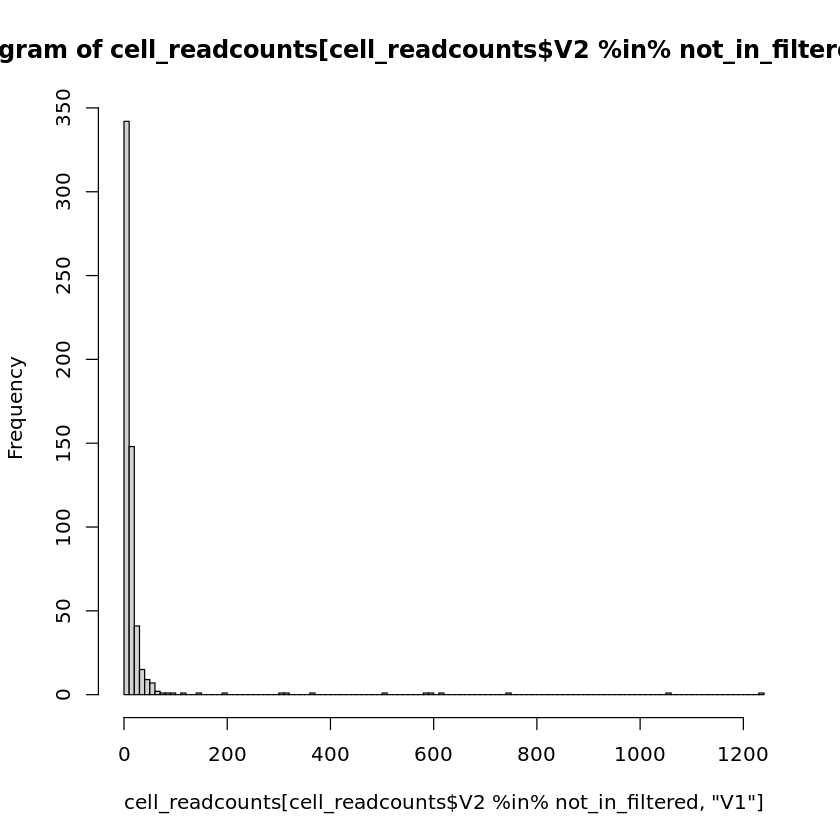

In [59]:
#cell_readcounts <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Datlinger/Jurkat/mapping_to_custom_ref/cell_readcounts.txt', header = FALSE)
'ATCTAGATACNN' %in% cell_readcounts$V2
not_in_filtered <- Jurkat_TCR.stimulated$cell[!Jurkat_TCR.stimulated$cell %in% filtered_barcodes$V1]
sum(not_in_filtered %in% cell_readcounts$V2)
hist(cell_readcounts[cell_readcounts$V2 %in% not_in_filtered,'V1'], breaks = 100) 
# reads counts are very low


In [60]:
# filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Datlinger/Jurkat/mapping_to_custom_ref/unstimulated/cell_umi_barcodes.500.cell_barcode.txt', header = FALSE)
# nrow(filtered_barcodes)
# sum(Jurkat_TCR.unstimulated$cell %in% filtered_barcodes$V1)


In [61]:
n_col = max(count.fields('../Datlinger/Jurkat_stimulated//lower_threshold/cells.gRNA.txt', sep = "\t"))
cells.gRNA <- read.table('../Datlinger/Jurkat_stimulated//lower_threshold/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
nrow(cells.num_features)
table(cells.num_features$num_features)


[1] 2336


   1    2    3    4    5    6    7    8   11   12 
1696  429  123   44   21   11    3    6    2    1 

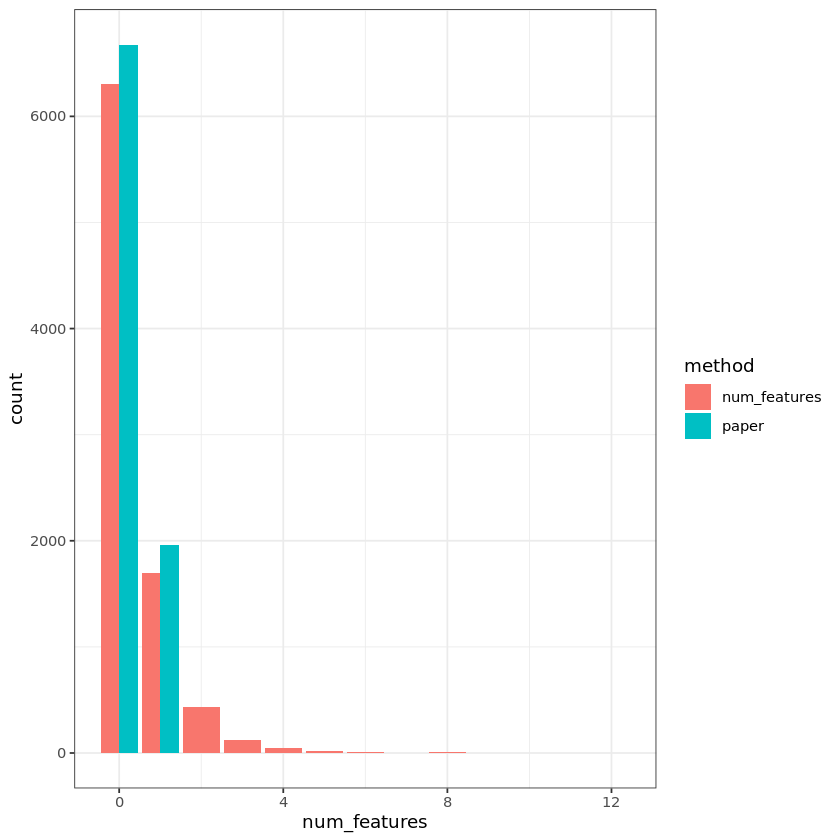

In [62]:
filtered_barcodes.merged <- merge(filtered_barcodes, Jurkat_TCR.stimulated, by.x = 'V1', by.y = 'cell', all.x = TRUE)
filtered_barcodes.merged$paper <- ifelse(is.na(filtered_barcodes.merged$grna),0,1)
filtered_barcodes.merged <- merge(filtered_barcodes.merged, cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
filtered_barcodes.merged[is.na(filtered_barcodes.merged)] <- 0
filtered_barcodes_merged.all.long <-  gather(filtered_barcodes.merged[,c(1,5,6)], key = 'method', value = 'num_features', -c(V1))
ggplot(filtered_barcodes_merged.all.long, aes(x=num_features, fill = method))+geom_bar(position="dodge")+
theme_bw()


In [63]:
head(filtered_barcodes.merged)


,V1,condition,replicate,grna,paper,num_features
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,AAAAAAAAAAAA,0,0,0,0,0
2,AAAAAACGTAGG,stimulated,3,Tcrlibrary_REL_2,1,1
3,AAAAAATAGCTC,0,0,0,0,0
4,AAAAATCCTAGA,0,0,0,0,0
5,AAAAATTTGGCC,stimulated,3,Tcrlibrary_NR4A1_2,1,1
6,AAAACAAGCGAC,0,0,0,0,0


cell barcode 'AAAAAAAAAAAA' doesn't seem normal

In [64]:
cell_umi_barcodes.500 <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Datlinger/Jurkat/mapping_to_custom_ref/cell_umi_barcodes.500.tsv', header = TRUE)


In [65]:
sum(cell_umi_barcodes.500$AAAAAAAAAAAA > 0)


[1] 524